### 1. Set up

In [16]:
import pandas as pd
import numpy as np

# Modelling libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [4]:
# file naming variables
latest_version = 'df_2023-01-22'
location = '/Users/Sim/Documents/Other/Programming/Personal Projects/property_valuation'

### 2. Data pre-processing & feature engineering

In [40]:
df=pd.read_csv(f'{location}/data/{latest_version}.csv')

In [41]:
df = df.drop('Unnamed: 0', axis=1)

df.columns

Index(['Date', 'Price', 'NearStat', 'StatDist(miles)', 'Prop_Type', 'Bedrooms',
       'Bathrooms', 'Floor_Size', 'Outdoor', 'Portered', 'Contract_Type',
       'Outcode', 'Outcode2', 'Outcode3', 'Postcode', 'Centrality', 'North',
       'Links', 'Date_Scraped', 'Avg_price'],
      dtype='object')

In [222]:
# Getting dummies vars
df2 = pd.concat([df, pd.get_dummies(df.iloc[:,2])], axis=1) #nearest station
df2 = pd.concat([df2, pd.get_dummies(df.iloc[:,4])], axis=1) #prop_type
df2 = pd.concat([df2, pd.get_dummies(df.iloc[:,10])], axis=1) #contract
df2 = pd.concat([df2, pd.get_dummies(df.iloc[:,12])], axis=1) #outcode2
df2 = pd.concat([df2, pd.get_dummies(df.iloc[:,18])], axis=1) #scraped_date

# Remove NA's
df2 = df2.dropna()

### 3. Exploratory data analysis

In [224]:
from sklearn.metrics import r2_score
def price_scatter(X, Y = 'Price'):
    fig, ax = plt.subplots()
    x, y = df2[f'{X}'], df2[f'{Y}']
    ax.scatter(x, y, color = 'b', s = 6, alpha = 0.3)

    fig.set_size_inches(5, 3.2)

    # formatting
    #ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '£{:,}'.format(int(x), ',')))
    #ax.yaxis.set_tick_params(which='major', labelcolor='black',labelleft=True)
    
    #ax.annotate('(max_depth=%s, accuracy=%s)' % (best_depth, best_acc), xy=(best_depth, best_acc), xytext=(best_depth + 1, best_acc+0.01), arrowprops=dict(arrowstyle="->", facecolor='black'))
    
    # Line of best fit
    ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
    #ax.annotate("r-squared = {:.3f}".format(r2_score(x,np.polyfit(x, y, 2))), (1400, 750000))
    
    plt.ylabel(f'{Y}')
    plt.xlabel(f'{X}')
    #plt.ylim([min(full_df3['Price'][f'{stat}'])- np.amax(yerr), max(full_df3['Price'][f'{stat}'])+np.amax(yerr)])

In [225]:
df2.columns

Index(['Date', 'Price', 'NearStat', 'StatDist(miles)', 'Prop_Type', 'Bedrooms',
       'Bathrooms', 'Floor_Size', 'Outdoor', 'Portered',
       ...
       'W8', 'W9', 'WC1', 'WC2', '2022-09-02', '2022-10-23', '2022-10-29',
       '2022-11-27', '2023-01-13', '2023-01-22'],
      dtype='object', length=191)

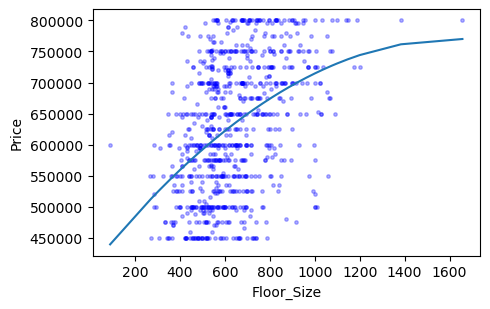

In [226]:
price_scatter(X = 'Floor_Size')
# Result = Clean outlier floor sizes

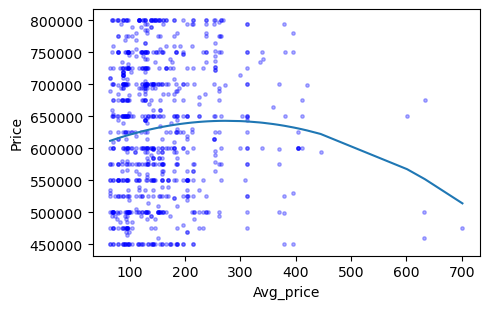

In [227]:
price_scatter(X = 'Avg_price')
# Result = Consider logging average price - also interact with floor_size

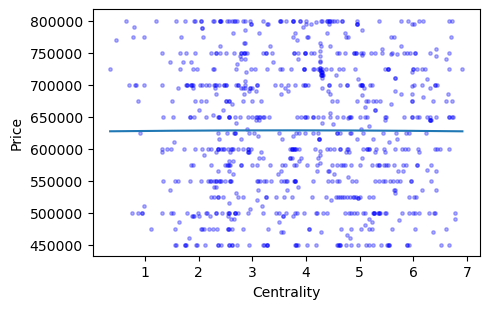

In [287]:
price_scatter(X = 'Centrality')

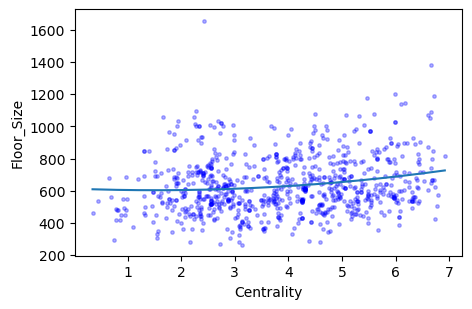

In [286]:
price_scatter(Y = 'Floor_Size',X = 'Centrality')
# Result = Clean outlier floor sizes

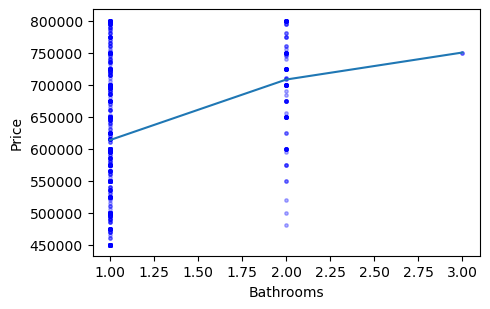

In [229]:
price_scatter(X = 'Bathrooms')
# Result = encode bathrooms as 1 or 2+

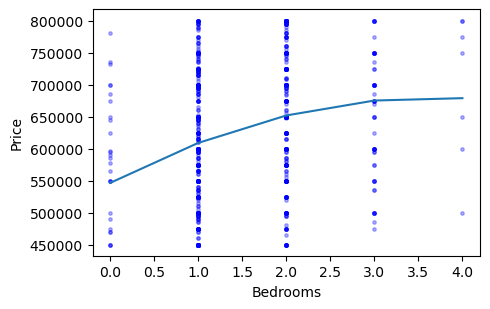

In [230]:
price_scatter(X = 'Bedrooms')
# Nothing required

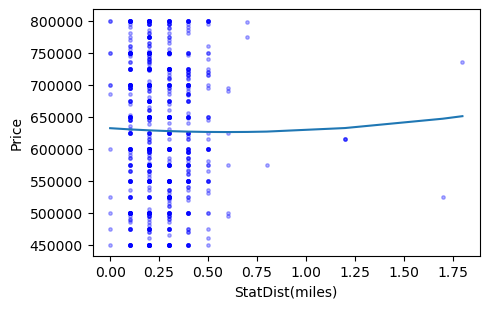

In [231]:
price_scatter(X = 'StatDist(miles)')
# Result = remove properties with StatDist(miles) > 2 (it had not recognised Battersea Power Station)

In [237]:
def price_bar(X, Y = 'Price', width = 5):
    # Getting average price (y) by category (x)    
    df_summarised = df.groupby([f'{X}'])[f'{Y}'].mean().sort_values(ascending = False)

    df_summarised.plot(kind='bar',figsize=(5,3.2),  color="b", fontsize=9, alpha = 0.8)    

    plt.ylabel(f'{Y}')
    plt.xlabel(f'{X}')
    plt.ylim(min(df_summarised)-250000)

In [238]:
df.columns
# NearStat = too many categories
# Outdoor, Portered, Contract_Type, North = all fine

Index(['Date', 'Price', 'NearStat', 'StatDist(miles)', 'Prop_Type', 'Bedrooms',
       'Bathrooms', 'Floor_Size', 'Outdoor', 'Portered', 'Contract_Type',
       'Outcode', 'Outcode2', 'Outcode3', 'Postcode', 'Centrality', 'North',
       'Links', 'Date_Scraped', 'Avg_price'],
      dtype='object')

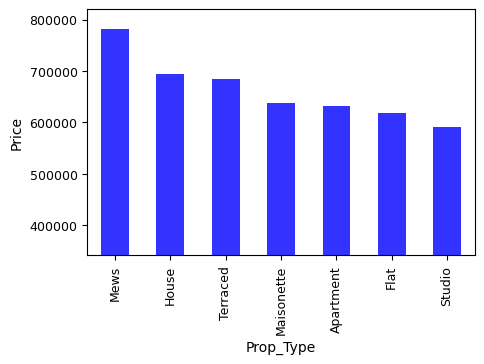

In [239]:
price_bar(X = 'Prop_Type')

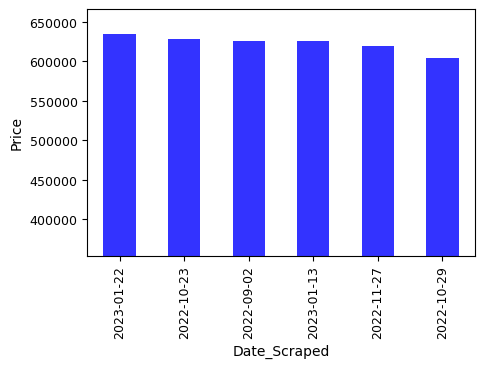

In [240]:
price_bar(X = 'Date_Scraped')

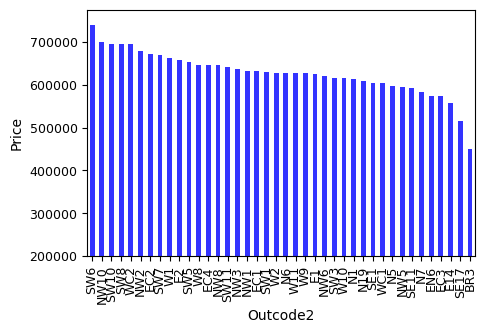

In [277]:
price_bar(X = 'Outcode2')

In [241]:
# Cleaning outlier floorsizes
df2 = df2.drop(df2[(df2.Floor_Size <= 200)].index)
                                               
df2 = df2.drop(df2[(df2.Floor_Size > 1400) & (df2.Price < 600000)].index)
df2[df2['Floor_Size'] > 1400]

,Date,Price,NearStat,StatDist(miles),Prop_Type,Bedrooms,Bathrooms,Floor_Size,Outdoor,Portered,...,W8,W9,WC1,WC2,2022-09-02,2022-10-23,2022-10-29,2022-11-27,2023-01-13,2023-01-22
3617,20230119.0,800000.0,Vauxhall Station,0.3,Flat,3.0,2.0,1657.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [242]:
# Result = Consider logging average price - also interact with floor_size
df2[df2['Avg_price'] > 700]

,Date,Price,NearStat,StatDist(miles),Prop_Type,Bedrooms,Bathrooms,Floor_Size,Outdoor,Portered,...,W8,W9,WC1,WC2,2022-09-02,2022-10-23,2022-10-29,2022-11-27,2023-01-13,2023-01-22
1231,20221007.0,475000.0,St. James's Park Station,0.1,Flat,1.0,1.0,377.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [243]:
# Result = encode bathrooms as 1 or 2+
df2.loc[df2['Bathrooms'] > 2, 'Bathrooms'] = 2

In [244]:
df2.columns

Index(['Date', 'Price', 'NearStat', 'StatDist(miles)', 'Prop_Type', 'Bedrooms',
       'Bathrooms', 'Floor_Size', 'Outdoor', 'Portered',
       ...
       'W8', 'W9', 'WC1', 'WC2', '2022-09-02', '2022-10-23', '2022-10-29',
       '2022-11-27', '2023-01-13', '2023-01-22'],
      dtype='object', length=191)

In [245]:
# Result = remove properties with StatDist(miles) > 2 (it had not recognised Battersea Power Station)
df2 = df2.rename(columns={'StatDist(miles)': 'StatDistMiles'})
df2 = df2.drop(df2[(df2.StatDistMiles >= 2)].index)

In [247]:
#df_varselect = df_varselect.drop_duplicates(['A','B'],keep= 'last')
#df2.iloc[[1277]]

### 4. Feature Selection

Before diving into the model creation, I first hypothesise what underlying factors causes property price variation and try to bring through features (variables) that reflect these. Below I outline a semi-comprehensive, mostly mutually exclusive list of these factors, which I've divided into 5 categories:

**Location**
1. Area aesthetics/desireability
2. Area safety
3. Proximity to a tube station
4. Proximity to central London
5. Proximity to amenities

**Property characteristics**
6. Size (floor-area)
7. No. bedrooms
8. No. bathrooms
9. Layout (well-proportioned?)
10. Upkeep/quality of interior (features & fittings)
11. Garden/outdoor area
12. Building type (terraced vs maisonette vs apartment etc.)
13. Porters/extra facilities

**Contract**
14. Leasehold vs share of freehold
15. Ground-rent
16. Service charge

**Previous owner**
17. Quick sale vs patient
18. Risk aversion

**Market conditions**
19. Prices rising vs falling

While many of these factors are possible to capture in the data, some are not available or simply unobservable.

In [309]:
# Leave out 'Studio', 'Freehold', stations and some of postcodes
variables = ['Price','StatDistMiles','Bedrooms','Bathrooms','Outdoor','Portered','Apartment','Flat','House',
             'Maisonette','Mews', 'Terraced','Leasehold','NW6','SW1','N1','W2','W9','SE1','N7','NW1','EC1','NW3',
             'SW11','WC1','W1','NW8','W10','SW3','NW5','W11','SE11','North','Centrality','Floor_Size', 
             '2022-10-23','2022-10-29', '2022-11-27','2023-01-13','2023-01-22', 'Avg_price']

# Leave out all bar one postcode
variables2 = ['Price','Centrality','Floor_Size','StatDistMiles','Bedrooms','Bathrooms', 'Avg_price','Outdoor',
              'Portered','Apartment','Flat','House', 'Maisonette','Mews', 'Terraced','Leasehold','North', 
             '2022-10-23','2022-10-29', '2022-11-27','2023-01-13','2023-01-22']

outcodes = [i for i in df.Outcode2.unique()]
variables2 = variables2 + outcodes[0:len(outcodes)-1]
print(variables2)

['Price', 'Centrality', 'Floor_Size', 'StatDistMiles', 'Bedrooms', 'Bathrooms', 'Avg_price', 'Outdoor', 'Portered', 'Apartment', 'Flat', 'House', 'Maisonette', 'Mews', 'Terraced', 'Leasehold', 'North', '2022-10-23', '2022-10-29', '2022-11-27', '2023-01-13', '2023-01-22', 'EC1', 'SW11', 'WC1', 'SW1', 'NW6', 'N7', 'W2', 'NW1', 'W9', 'NW3', 'SW8', 'NW8', 'SW7', 'SE1', 'SE11', 'W10', 'N19', 'WC2', 'W1', 'SW3', 'N1', 'SW5', 'EC4', 'NW5', 'EC2', 'W11', 'N5', 'SW10', 'NW10', 'W8', 'E1', 'N6', 'EC3', 'NW2', 'E2', 'SE17', 'E14', 'SW6', 'BR3']


In [310]:
stations = ['Edgware Road (Circle, District, Hammersmith & City) Station',
            'St. John\'s Wood Station','Marylebone Station','Paddington Station',                                             
            'Edgware Road (Bakerloo) Station', 'Warwick Avenue Station','Lancaster Gate Station',
            'Marble Arch Station','Maida Vale Station',
            'Baker Street Station','Royal Oak Station']

variables3 = variables2 + stations

In [316]:
df3 = df2[variables2]


In [317]:
# Adding quadratics
pd.options.mode.chained_assignment = None  # default='warn'
df3['Centrality2'] = df3['Centrality'] **2
df3['Floor_Size2'] = df3['Floor_Size'] **2
df3['StatDistMiles2'] = df3['StatDistMiles'] **2
df3['Avg_price2'] = df3['Avg_price'] **2

In [319]:
# Adding interactions
df3['Floor_Centrality'] = df3['Floor_Size'] * df3['Centrality']
df3['Floor_Bedrooms'] = df3['Floor_Size'] * df3['Bedrooms']

In [320]:
df3.columns

Index(['Price', 'Centrality', 'Floor_Size', 'StatDistMiles', 'Bedrooms',
       'Bathrooms', 'Avg_price', 'Outdoor', 'Portered', 'Apartment', 'Flat',
       'House', 'Maisonette', 'Mews', 'Terraced', 'Leasehold', 'North',
       '2022-10-23', '2022-10-29', '2022-11-27', '2023-01-13', '2023-01-22',
       'EC1', 'SW11', 'WC1', 'SW1', 'NW6', 'N7', 'W2', 'NW1', 'W9', 'NW3',
       'SW8', 'NW8', 'SW7', 'SE1', 'SE11', 'W10', 'N19', 'WC2', 'W1', 'SW3',
       'N1', 'SW5', 'EC4', 'NW5', 'EC2', 'W11', 'N5', 'SW10', 'NW10', 'W8',
       'E1', 'N6', 'EC3', 'NW2', 'E2', 'SE17', 'E14', 'SW6', 'BR3',
       'Centrality2', 'Floor_Size2', 'StatDistMiles2', 'Avg_price2',
       'Floor_Centrality', 'Floor_Bedrooms'],
      dtype='object')

**Feature selection justification**

The variables have been chosen to best capture the factors that influence property valuations. A number of models can be built to estimate the hypothetical 'true' model:

*Model 1*
$ \hat{Y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}Centrality_{i} + \hat{\beta}_{2}FloorSize_{i} + \hat{\beta}_{3}StationDist_{i}  + \hat{\beta}_{4}AreaPrices_{i} + + \hat{\beta}_{5}Outdoor_{i} + \hat{\beta}_{6}Portered_{i} + \hat{\beta}_{7}ContractType_{i} + \hat{\beta}_{8}NorthvsSouth_{i} + 
\hat{\beta}_{9-14}BuildingTypeDummies_{i} + \hat{\beta}_{15-20}DateScrapedDummies_{i} + \hat{\beta}_{21-59}PostcodeDummies_{i} + QuadraticTerms + InteractionTerms $


*Model 2*
(log model)

### 5. Regressions for causal inference

#### 5A. Model 1 - *Linear Model*

In [321]:
# Create feature and target arrays
X = np.array(df3.iloc[:,1:df3.shape[1]])
y = np.array(df3.iloc[:,0])

In [323]:
features = list(df3.iloc[:,1:df3.shape[1]].columns)
features.insert(0, 'Constant')

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary(xname=features))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     10.01
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.02e-61
Time:                        11:04:00   Log-Likelihood:                -10714.
No. Observations:                 843   AIC:                         2.154e+04
Df Residuals:                     785   BIC:                         2.182e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Constant          2.115e+05   4.78e+04  

### 6. Interpretation
